In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

# Original Update Function

In [37]:
Ts = np.arange(0.0,4.01,0.4)
chains = np.arange(1,2,1)
print(chains)
Ls = [4,6,8,10]
energies_og = dict()
a_rates_og = dict()

for L in Ls:
    energies_list = []
    a_rates_list = []
    print(f"L = {L}")
    for T in Ts:
        T_st = round(T,2)
        chains_e_list = []
        chains_a_rate_list = []
        for chain in chains:
            df = pd.read_csv(f'./data/q2/L_{L}/avgvals_T_{T_st}_chain{chain}.csv')
            energies_np = np.array(df["avenergy"])
            energies2_np = np.array(df["avenergy2"])
            a_rates_np = np.array(df["accept_rate"])
            energies_list.append(energies_np[-1])
            a_rates_list.append(a_rates_np[-1])
            
#         energies_list.append(np.mean(chains_e_list))
#         a_rates_list.append(np.mean(chains_a_rate_list))
        
    energies[f"{L}"] = energies_list
    a_rates[f"{L}"] = a_rates_list


[1]
L = 4
L = 6
L = 8
L = 10


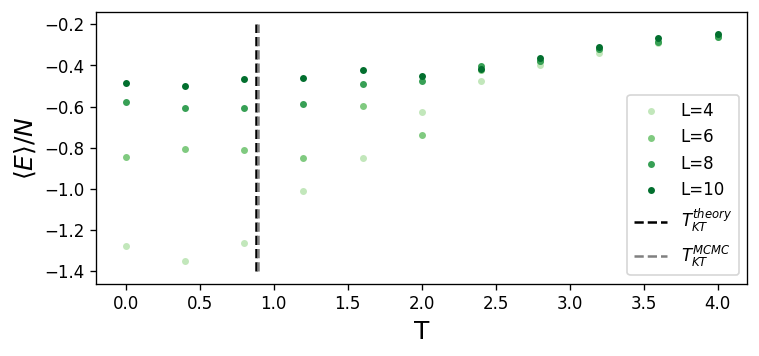

In [43]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
Tkt_theory = 0.8816
Tkt_MCMC = 0.8935
colors = plt.cm.Greens(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    plt.scatter(Ts,np.array(energies[f"{L}"]),s=10,color=colors[3*i],label=f"L={L}")
plt.vlines(Tkt_theory,-1.4,-0.2,'k',linestyle = '--',label="$T_{KT}^{theory}$")
plt.vlines(Tkt_MCMC,-1.4,-0.2,'grey',linestyle = '--',label="$T_{KT}^{MCMC}$")
plt.ylabel('$\\langle E \\rangle/N$',fontsize=15)
plt.xlabel('T',fontsize=15)
plt.legend()
plt.show()

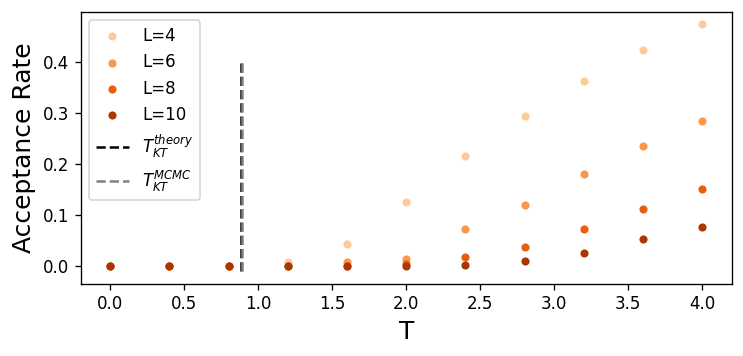

In [47]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Oranges(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    plt.scatter(Ts,a_rates[f"{L}"],s=15,color=colors[3*i],label=f"L={L}")
plt.vlines(Tkt_theory,-0.01,0.4,'k',linestyle = '--',label="$T_{KT}^{theory}$")
plt.vlines(Tkt_MCMC,-0.01,0.4,'grey',linestyle = '--',label="$T_{KT}^{MCMC}$")
plt.ylabel('Acceptance Rate',fontsize=15)
plt.xlabel('T',fontsize=15)
plt.legend()
plt.show()

# Cluster Update Function

In [234]:
Ts = np.arange(0.2,2.01,0.01)
chains = np.arange(1,11,1)
Ls = [8,10,12,14,16,20,24]
energies = dict()
CV = dict()
ps = dict()

for L in Ls:
    energies_list = []
    CV_list = []
    ps_list = []
    print(f"L = {L}")
    for T in Ts:
        T_st = round(T,2)
        chains_e_list = []
        chains_CV_list = []
        chains_ps_list = []
        for chain in chains:
            df = pd.read_csv(f'./data/q2_cluster/L_{L}/avgvals_T_{T_st}_chain{chain}.csv')
            energies_np = np.array(df["avenergy"])
            energies2_np = np.array(df["avenergy2"])
            CV_val = (energies2_np[-1] - (energies_np[-1]*L**2)**2)/T**2
            ps_np = np.array(df["pss"])
            chains_e_list.append(energies_np[-1])
            chains_CV_list.append(CV_val)
            chains_ps_list.append(ps_np[-1])
            
        energies_list.append(np.mean(chains_e_list))
        CV_list.append(np.mean(chains_CV_list))
        ps_list.append(np.mean(chains_ps_list))
        
    energies[f"{L}"] = energies_list
    CV[f"{L}"] = CV_list
    ps[f"{L}"] = ps_list
    

L = 8
L = 10
L = 12
L = 14
L = 16
L = 20
L = 24


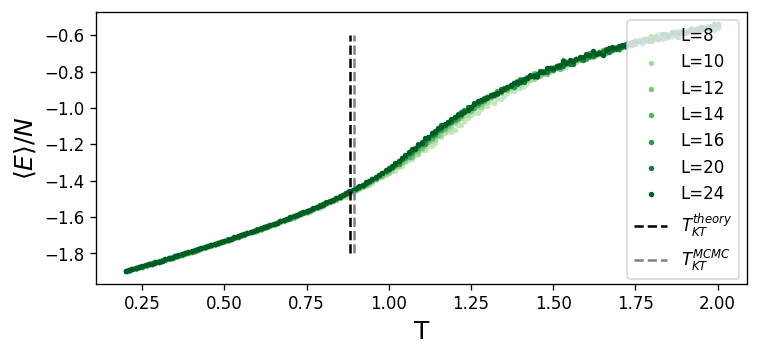

In [235]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Greens(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    plt.scatter(Ts,energies[f"{L}"],s=5,color=colors[3*i],label=f"L={L}")
plt.vlines(Tkt_theory,-1.8,-0.6,'k',linestyle = '--',label="$T_{KT}^{theory}$")
plt.vlines(Tkt_MCMC,-1.8,-0.6,'grey',linestyle = '--',label="$T_{KT}^{MCMC}$")
plt.ylabel('$\\langle E \\rangle/N$',fontsize=15)
plt.xlabel('T',fontsize=15)
plt.legend()
plt.show()

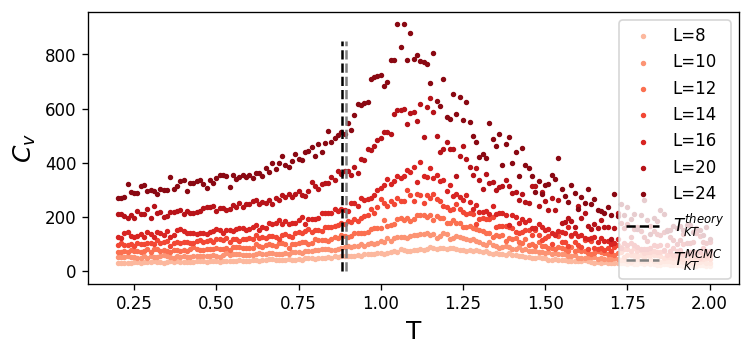

In [242]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Reds(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    plt.scatter(Ts,CV[f"{L}"],s=5,color=colors[3*i],label=f"L={L}")
plt.vlines(Tkt_theory,0,850,'k',linestyle = '--',label="$T_{KT}^{theory}$")
plt.vlines(Tkt_MCMC,0,850,'grey',linestyle = '--',label="$T_{KT}^{MCMC}$")
plt.ylabel('$C_v$',fontsize=15)
plt.xlabel('T',fontsize=15)
plt.legend()
plt.show()

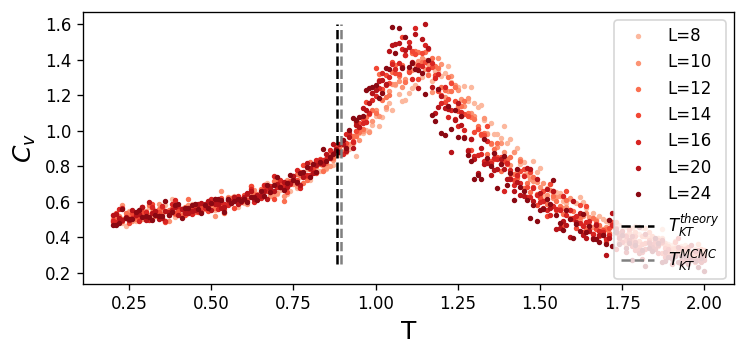

In [237]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Reds(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    CV_np = np.array(CV[f"{L}"])/L**2
    plt.scatter(Ts,CV_np,s=5,color=colors[3*i],label=f"L={L}")
plt.vlines(Tkt_theory,0.25,1.6,'k',linestyle = '--',label="$T_{KT}^{theory}$")
plt.vlines(Tkt_MCMC,0.25,1.6,'grey',linestyle = '--',label="$T_{KT}^{MCMC}$")
plt.ylabel('$C_v$',fontsize=15)
plt.xlabel('T',fontsize=15)
plt.legend(loc='upper right')
plt.show()

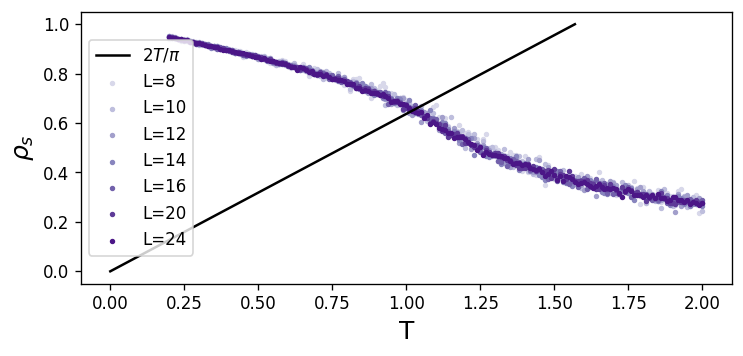

In [278]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
Ls = [8,10,12,14,16,20,24]
colors = plt.cm.Purples(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    plt.scatter(Ts,ps[f"{L}"],s=5,color=colors[3*i],label=f"L={L}")
t_fine = np.arange(0.0,np.pi/2,0.01)
plt.plot(t_fine,2*t_fine/np.pi,color='k',label = "$2T/\\pi$")
plt.ylabel('$\\rho_s$',fontsize=15)
plt.xlabel('T',fontsize=15)
# plt.ylim(-0.1,1.1)
# plt.xlim(-0.1,2.)
# plt.xlim(0.9,1.25)
# plt.ylim(0.4,0.8)
plt.legend(loc='center left')
plt.show()

In [268]:
from sklearn.linear_model import LinearRegression

8 [[-0.40347173]] [1.08072603]
10 [[-0.6623747]] [1.33716574]
12 [[-0.58591902]] [1.2529981]
14 [[-0.56637752]] [1.23831248]
16 [[-0.61414064]] [1.28452031]
20 [[-0.61085401]] [1.27477341]
24 [[-0.66157351]] [1.32649154]


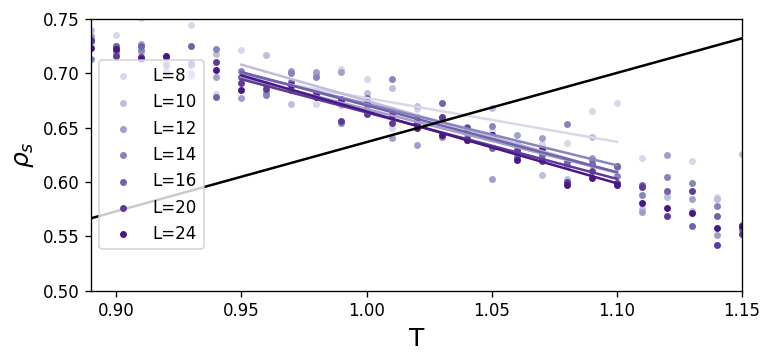

In [275]:
fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Purples(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
indiceslow = np.where((Ts > 0.95) & (Ts < 0.951))[0][0]
indiceshigh = np.where((Ts > 1.11) & (Ts < 1.111))[0][0]
for i in range(len(Ls)):
    L = Ls[i]
    Ts_linear = np.reshape(Ts[indiceslow:indiceshigh],(-1,1))
    psL = np.reshape(np.array(ps[f"{L}"])[indiceslow:indiceshigh],(-1,1))
    linear_regressor = LinearRegression()
    linear_regressor.fit(Ts_linear, psL)
    print(L, linear_regressor.coef_,linear_regressor.intercept_)
    psL_linear = linear_regressor.predict(Ts_linear)
    plt.plot(Ts_linear[:,0],psL_linear[:,0],color=colors[3*i])
    plt.scatter(Ts,ps[f"{L}"],s=10,color=colors[3*i],label=f"L={L}")
t_fine = np.arange(0.0,np.pi/2,0.01)
plt.plot(t_fine,2*t_fine/np.pi,color='k')
plt.ylabel('$\\rho_s$',fontsize=15)
plt.xlabel('T',fontsize=15)
# plt.ylim(-0.1,1.1)
# plt.xlim(-0.1,2.)
plt.xlim(0.89,1.15)
plt.ylim(0.5,0.75)
plt.legend(loc='center left')
plt.show()

In [254]:
def mainline(x):
    return 2*x/np.pi
def line8_2(x):
    return 1.57667214 - -0.89544124*x
def line10_2(x):
    return 1.88751504 - 1.19891285*x
def line12_2(x):
    return 1.10702828 - 0.45019068*x
def line14_2(x):
    return 1.67265041 - 0.99046181*x
def line16_2(x):
    return 1.34945118 - 0.67295962*x
def line20_2(x):
    return 0.85258745 - 0.19276506*x
def line24_2(x):
    return 1.51752865 - 0.84753188*x

In [255]:
x_mesh = np.arange(0.95,1.05,0.001)
for x_ in x_mesh:
    if np.isclose(line8_2(x_),mainline(x_),atol=10**-3):
        cross8 = x_
        print(8,cross8)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line10_2(x_),mainline(x_),atol=10**-3):
        cross10 = x_
        print(10,cross10)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line12_2(x_),mainline(x_),atol=10**-3):
        cross12 = x_
        print(12,cross12)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line14_2(x_),mainline(x_),atol=10**-3):
        cross14 = x_
        print(14,cross14)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line16_2(x_),mainline(x_),atol=10**-3):
        cross16 = x_
        print(16,cross16)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line20_2(x_),mainline(x_),atol=10**-3):
        cross20 = x_
        print(20,cross20)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line24_2(x_),mainline(x_),atol=10**-3):
        cross24 = x_
        print(24,cross24)
    else:
        continue

10 1.028
12 1.018
12 1.0190000000000001
14 1.028
16 1.03
16 1.0310000000000001
20 1.0270000000000001
20 1.028
20 1.029
24 1.022
24 1.0230000000000001


In [270]:
def mainline(x):
    return 2*x/np.pi
def line8(x):
    return 1.08072603 - 0.40347173*x
def line10(x):
    return 1.33716574 - 0.6623747*x
def line12(x):
    return 1.2529981 - 0.58591902*x
def line14(x):
    return 1.23831248 - 0.56637752*x
def line16(x):
    return 1.28452031 - 0.61414064*x
def line20(x):
    return 1.27477341 - 0.61085401*x
def line24(x):
    return 1.32649154 - 0.66157351*x

In [271]:
x_mesh = np.arange(0.95,1.05,0.001)
for x_ in x_mesh:
    if np.isclose(line8(x_),mainline(x_),atol=10**-3):
        cross8 = x_
        print(8,cross8)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line10(x_),mainline(x_),atol=10**-3):
        cross10 = x_
        print(10,cross10)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line12(x_),mainline(x_),atol=10**-3):
        cross12 = x_
        print(12,cross12)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line14(x_),mainline(x_),atol=10**-3):
        cross14 = x_
        print(14,cross14)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line16(x_),mainline(x_),atol=10**-3):
        cross16 = x_
        print(16,cross16)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line20(x_),mainline(x_),atol=10**-3):
        cross20 = x_
        print(20,cross20)
    else:
        continue
for x_ in x_mesh:
    if np.isclose(line24(x_),mainline(x_),atol=10**-3):
        cross24 = x_
        print(24,cross24)
    else:
        continue

8 1.0390000000000001
8 1.04
10 1.029
10 1.03
12 1.025
14 1.029
14 1.03
16 1.0270000000000001
20 1.022
24 1.022


0.23126322011173425
0.18861169701161387
0.161949586482928
0.14358277762203578
0.13008556131285048
0.11142791485145642
0.09900964465717527
[[0.23126322]
 [0.1886117 ]
 [0.16194959]
 [0.14358278]
 [0.13008556]
 [0.11142791]
 [0.09900964]]
[[0.12265457]] [1.00932268]


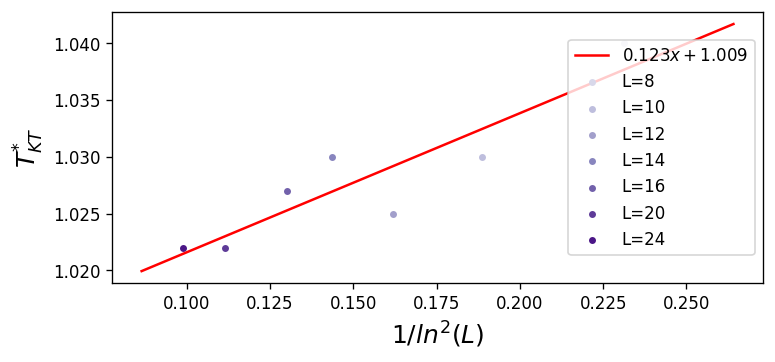

In [283]:
# crosses = [1.04,1.03,1.025,1.03,1.027,1.022,1.022]
crosses = [cross8,cross10,cross12,cross14,cross16,cross20,cross24]
Ls_np = np.reshape(np.array(Ls),(-1,1))
crosses_np = np.reshape(np.array(crosses),(-1,1))

fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Purples(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    x = Ls_np[i,0]
    x = 1/np.log(x)**2
    print(x)
    plt.scatter(x,crosses[i],s=10,color=colors[3*i],label=f"L={L}")

linear_regressor = LinearRegression()
X = 1/np.log(Ls_np)**2
print(X)
linear_regressor.fit(X, crosses_np)
Ls_test = [7,8,10,12,14,16,20,24,30]
Ls_test_np = np.reshape(np.array(Ls_test),(-1,1))
X_test = 1/np.log(Ls_test_np)**2
prediction = linear_regressor.predict(X_test)
slope = np.round(linear_regressor.coef_,3)
intercept = np.round(linear_regressor.intercept_,3)
plt.plot(X_test,prediction[:,0],color='red',label = f'${slope[0,0]}x + {intercept[0]}$')
print(linear_regressor.coef_,linear_regressor.intercept_)
plt.ylabel('$T_{KT}^{*}$',fontsize=15)
plt.xlabel('$1/ln^2(L)$',fontsize=15)
# plt.ylim(-0.1,1.1)
# plt.xlim(-0.1,2.)
# plt.xlim(0.89,1.15)
# plt.ylim(0.5,0.75)
plt.legend(loc='center right')
plt.show()

0.14358277762203578
0.13008556131285048
0.11142791485145642
0.09900964465717527
[[0.14358278]
 [0.13008556]
 [0.11142791]
 [0.09900964]]
[[0.19332075]] [1.00185307]


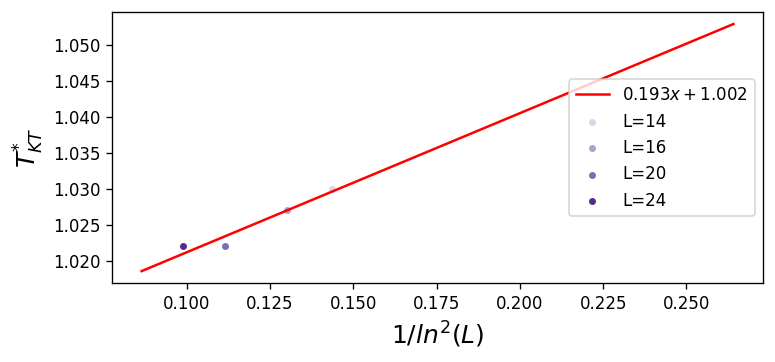

In [284]:
# crosses = [1.04,1.03,1.025,1.03,1.027,1.022,1.022]
Ls = [14,16,20,24]
crosses = [cross14,cross16,cross20,cross24]
Ls_np = np.reshape(np.array(Ls),(-1,1))
crosses_np = np.reshape(np.array(crosses),(-1,1))

fig = plt.figure(1,figsize=(7,3), dpi=120, facecolor='w', edgecolor='k')
colors = plt.cm.Purples(np.linspace(0, 1, 4*len(Ls)))[len(Ls):]
for i in range(len(Ls)):
    L = Ls[i]
    x = Ls_np[i,0]
    x = 1/np.log(x)**2
    print(x)
    plt.scatter(x,crosses[i],s=10,color=colors[3*i],label=f"L={L}")

linear_regressor = LinearRegression()
X = 1/np.log(Ls_np)**2
print(X)
linear_regressor.fit(X, crosses_np)
Ls_test = [7,8,10,12,14,16,20,24,30]
Ls_test_np = np.reshape(np.array(Ls_test),(-1,1))
X_test = 1/np.log(Ls_test_np)**2
prediction = linear_regressor.predict(X_test)
slope = np.round(linear_regressor.coef_,3)
intercept = np.round(linear_regressor.intercept_,3)
plt.plot(X_test,prediction[:,0],color='red',label = f'${slope[0,0]}x + {intercept[0]}$')
print(linear_regressor.coef_,linear_regressor.intercept_)
plt.ylabel('$T_{KT}^{*}$',fontsize=15)
plt.xlabel('$1/ln^2(L)$',fontsize=15)
# plt.ylim(-0.1,1.1)
# plt.xlim(-0.1,2.)
# plt.xlim(0.89,1.15)
# plt.ylim(0.5,0.75)
plt.legend(loc='center right')
plt.show()